In [2]:
import matplotlib.pyplot as plt
import cv2 as cv

from utils import Thresholder, GrayImage, imshow

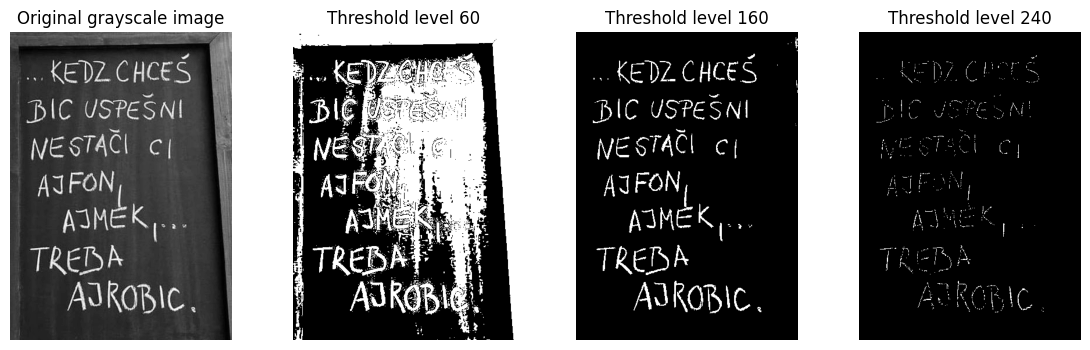

In [3]:
# nacitanie ilustracneho obrazka
img = GrayImage("img/thresholding/tabula.jpg")

# vykreslenie obrazka + niektore thresholdy
fig,ax = plt.subplots(1,4, figsize=(14,4))

imshow(img, ax=ax[0])
imshow(img.threshold(60), ax=ax[1])
imshow(img.threshold(160), ax=ax[2])
imshow(img.threshold(240), ax=ax[3])

ax[0].set_title(f"Original grayscale image")
ax[1].set_title(f"Threshold level 60")
ax[2].set_title(f"Threshold level 160")
ax[3].set_title(f"Threshold level 240")
plt.show()

In [4]:
# zaobalenie obrazka do triedy obsahujucej metody thresholdingu
thr = Thresholder(img)

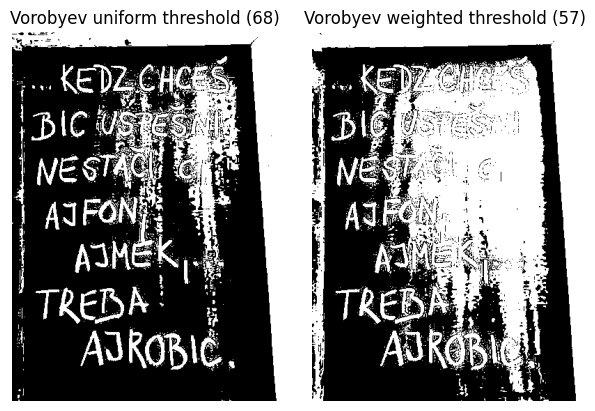

In [5]:
# Vorobyevov threshold - rovnomerne aj vazene rozdelenie
fig,ax = plt.subplots(1,2, figsize=(6,4), constrained_layout=True)
out1, out2 = thr.vorobyev_threshold("uniform"), thr.vorobyev_threshold("weighted")
imshow(out1, ax=ax[0])
imshow(out2, ax=ax[1])
ax[0].set_title(f"Vorobyev uniform threshold ({thr.find_level(out1)})")
ax[1].set_title(f"Vorobyev weighted threshold ({thr.find_level(out2)})")
plt.show()

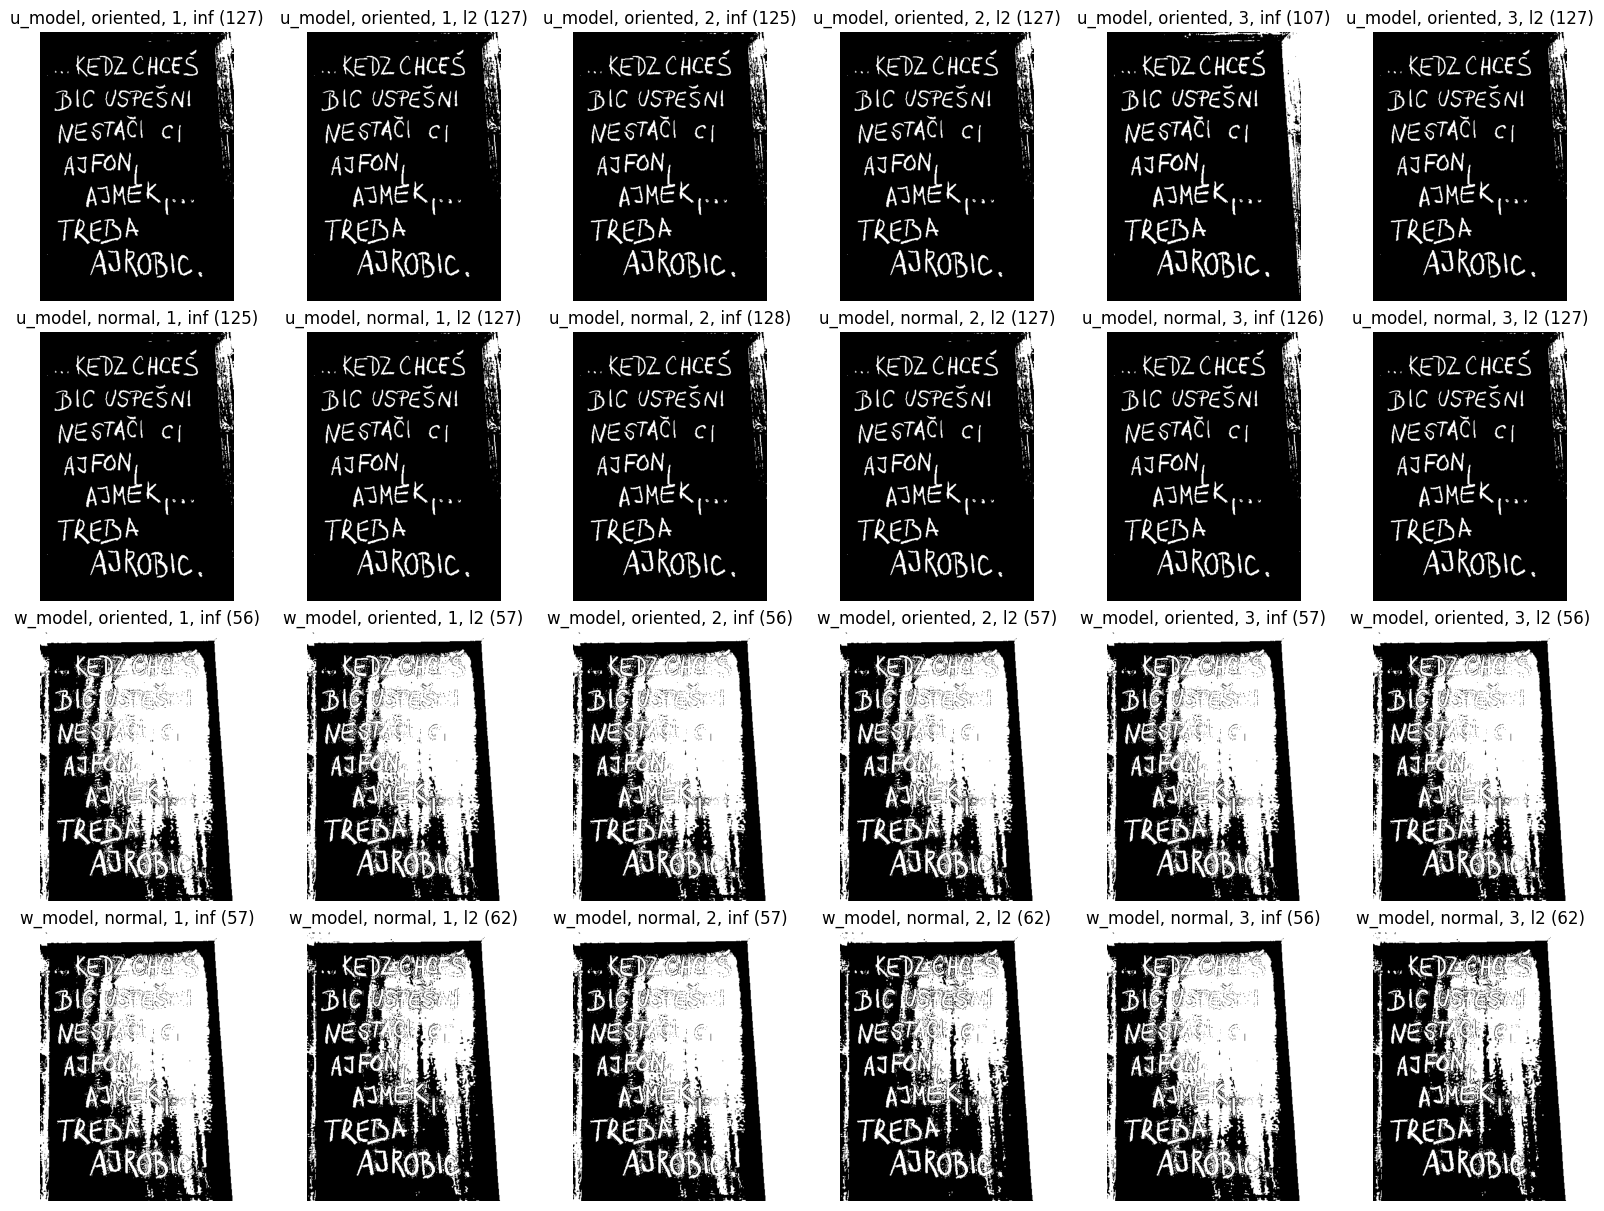

In [5]:
# porovnanie roznych vzdialenostnych metod thresholdingu
fig,ax = plt.subplots(4,6, figsize=(16,12), constrained_layout=True)
i=0
for type in ["uniform", "weighted"]:
    for distance_type in ["oriented", "normal"]:
        for distance_norm in [cv.DIST_L1, cv.DIST_L2, cv.DIST_C]:
            for minimalization_norm in ["inf", "l2"]:
                axx = ax[i//6, i%6]
                output = thr.distance_threshold(type, distance_type, distance_norm, minimalization_norm)
                imshow(output, ax=axx)
                axx.set_title(f"{type[0]}_model, {distance_type}, {distance_norm}, {minimalization_norm} ({thr.find_level(output)})")
                i+=1

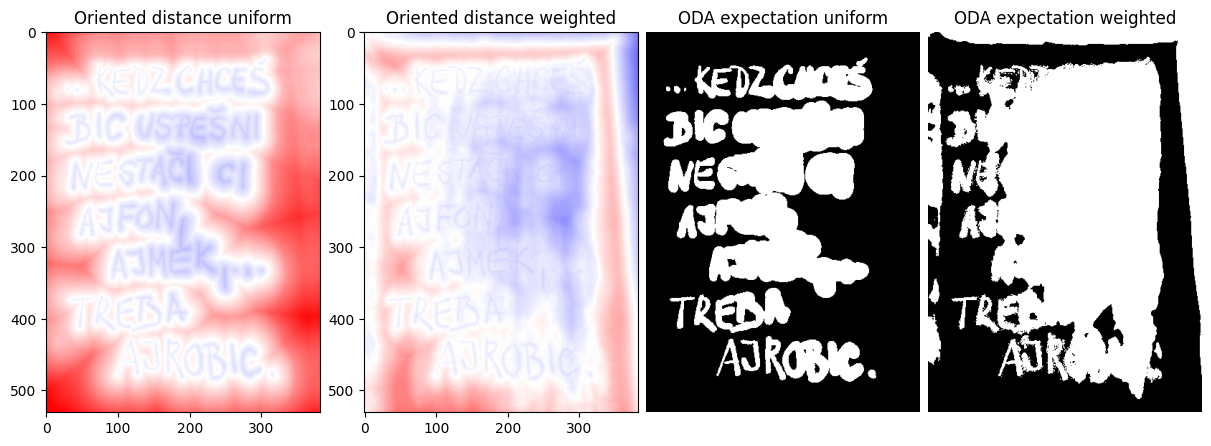

In [6]:
# vykreslenie ODA strednej hodnoty aj strednej vzdialenostnej funkcie
fig,ax = plt.subplots(1,4, figsize=(12,5), constrained_layout=True)
imshow(thr.oda_expectation("uniform"), ax=ax[2])
imshow(thr.oda_expectation("weighted"), ax=ax[3])
ax[0].imshow(thr.RS["uniform"]._oda_matrix, cmap="bwr", vmin=-50, vmax=50)
ax[1].imshow(thr.RS["weighted"]._oda_matrix, cmap="bwr", vmin=-50, vmax=50)
ax[0].set_title(f"Oriented distance uniform")
ax[1].set_title(f"Oriented distance weighted")
ax[2].set_title(f"ODA expectation uniform")
ax[3].set_title(f"ODA expectation weighted")
plt.show()

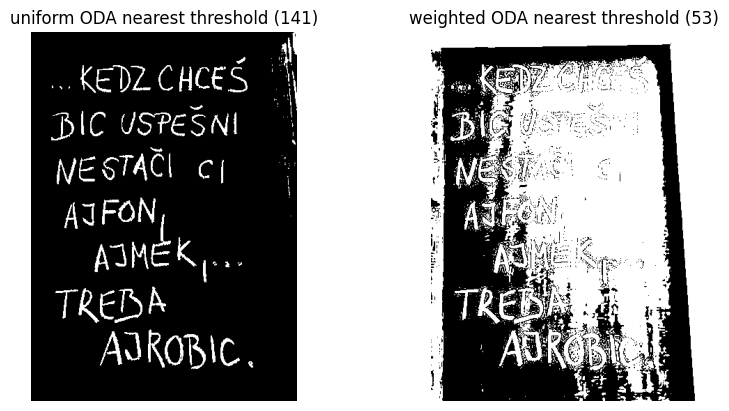

In [7]:
# nasa modifikacia - najdenie thresholdu najblizsieho k ODA
fig,ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
out1 = thr.find_ODA_nearest("uniform")
out2 = thr.find_ODA_nearest("weighted")
imshow(out1, ax=ax[0])
imshow(out2, ax=ax[1])
ax[0].set_title(f"uniform ODA nearest threshold ({thr.find_level(out1)})")
ax[1].set_title(f"weighted ODA nearest threshold ({thr.find_level(out2)})")
plt.show()